In [1]:
import pandas as pd
data = pd.read_csv('sensor_data_200.txt', delimiter=' ', header=None, names=('date', 'time', 'ir', 'lidar'))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
5,20180122,95835,327,212
6,20180122,95838,293,215
7,20180122,95840,309,218
8,20180122,95843,323,208
9,20180122,95846,292,217


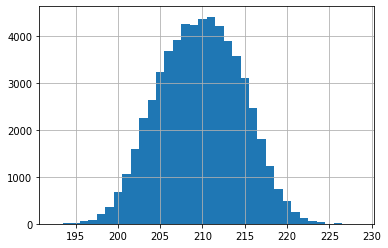

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
data['lidar'].hist(bins=data['lidar'].max() - data['lidar'].min(), align='left')

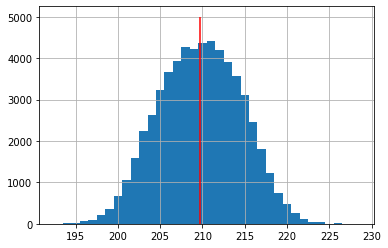

In [5]:
data['lidar'].hist(bins=data['lidar'].max() - data['lidar'].min(), align='left')
plt.vlines(data['lidar'].mean(), ymin=0, ymax=5000, color='red')

In [6]:
freqs = pd.DataFrame(data['lidar'].value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [8]:
freqs['prob'] = freqs['lidar'] / len(data['lidar'])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
prob,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


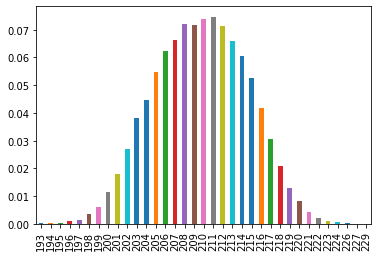

In [10]:
freqs['prob'].sort_index().plot.bar()

In [16]:
def drawing():
    return freqs.sample(n=1, weights='prob').index[0]
drawing()

216

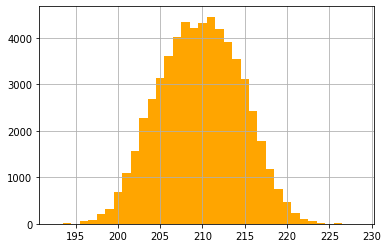

In [23]:
samples = [drawing() for _ in range(len(data))]
simulated = pd.DataFrame(samples, columns=['lidar'])
simulated['lidar'].hist(bins=simulated['lidar'].max() - simulated['lidar'].min(), color='orange', align='left')

In [24]:
import math
def p(z, mu=209.7, std=23.4):
    return math.exp(-(z - mu) ** 2 / (2 * std)) / math.sqrt(2 * math.pi * std)

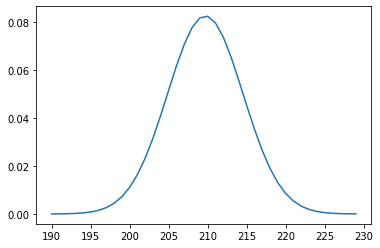

In [25]:
zs = range(190, 230)
ys = [p(z) for z in zs]
plt.plot(zs, ys)

<BarContainer object of 35 artists>

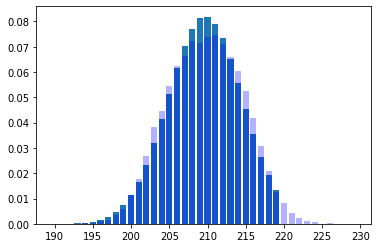

In [26]:
def prob(z, width=0.5):
    return width * (p(z + width)  + p(z - width))
zs = range(190, 220)
ys = [prob(z) for z in zs]
plt.bar(zs, ys)
f = freqs['prob'].sort_index()
plt.bar(f.index, f.values, color='blue', alpha=0.3)

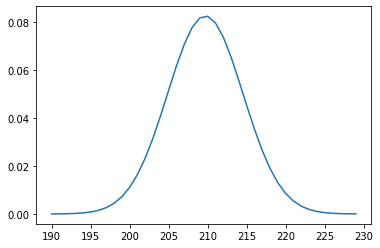

In [29]:
from scipy.stats import norm

zs = range(190, 230)
ys = [norm.pdf(z, 209.7, math.sqrt(23.4)) for z in zs]

plt.plot(zs, ys)

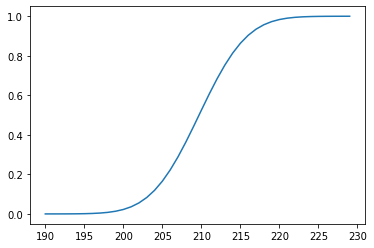

In [30]:
ys = [norm.cdf(z, 209.7, math.sqrt(23.4)) for z in zs]

plt.plot(zs, ys)

<BarContainer object of 40 artists>

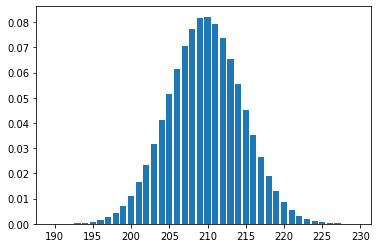

In [31]:
ys = [norm.cdf(z + 0.5, 209.7, math.sqrt(23.4)) - norm.cdf(z - 0.5, 209.7, math.sqrt(23.4)) for z in zs]
plt.bar(zs, ys)